# CREDIT EDA CASE STUDY

#### GROUP FACILIATOR - ANKIT GUPTA
#### GROUP MEMBER - VISHWANTRA SHARMA



**Case Study** - . We work for a consumer finance company which specialises in lending various types of loans to urban customers. We use EDA to analyse the patterns present in the data to ensure that the applicants capable of repaying the loan are not rejected by the company. 

When the company receives loan application, the approval of loan application based on applicant's profile. There are two links associated with the bank's decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1.	**Approved:** The Company has approved loan Application.
2.	**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
3.	**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).
4.	**Unused offer:**  Loan has been cancelled by the client but on different stages of the process.



**OBJECTIVES OF THE CASE STUDY**

1. To identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. 

2. To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

3. To develop the understanding of the domain, and are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.


# EXPLORATORY DATA ANALYSIS

# 1. Importing Required Libraries and Dataset

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#Import the dataset application data
df1=pd.read_csv("application_data.csv")


# 2. Check the structure of the data

In [5]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Shape of the datsets
df1.shape

(307511, 122)

In [8]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# 3. Quality check and Missing values

In [9]:
# Percentage of missing values in application data
mis_val=(100*df1.isnull().sum()/len(df1)).round(2)
print(mis_val)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [10]:
#Remove columns where are missing values are greater than equal to 50%
miscol_df1 = list(mis_val[mis_val.values>=50.00].index)

df1.drop(labels=miscol_df1,axis=1,inplace=True)

In [11]:
df1.shape

(307511, 81)

In [12]:
#columns with missing values
missingData = round(100*(df1.isnull().sum()/len(df1)), 2)
missingData[missingData != 0]

AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OCCUPATION_TYPE                 31.35
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
FLOORSMAX_MEDI                  49.76
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
dtype: float64

**columns with 13% missing values**

AMT_REQ_CREDIT_BUREAU_HOUR   --   13.50

AMT_REQ_CREDIT_BUREAU_DAY    --   13.50

AMT_REQ_CREDIT_BUREAU_WEEK   --   13.50

AMT_REQ_CREDIT_BUREAU_MON    --   13.50

AMT_REQ_CREDIT_BUREAU_QRT    --   13.50

AMT_REQ_CREDIT_BUREAU_YEAR    --  13.50

In [13]:
#imputation and finding best value 
df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]= df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

In [14]:
#datatypes of columns in application data
df1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [15]:
# convert negative DAYS_BIRTH ,DAYS_EMPLOYED, DAYS_REGISTRATION ,DAYS_ID_PUBLISH to positive
df1['DAYS_BIRTH'] = df1['DAYS_BIRTH'].abs()
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].abs()
df1['DAYS_REGISTRATION'] = df1['DAYS_REGISTRATION'].abs()
df1['DAYS_ID_PUBLISH'] = df1['DAYS_ID_PUBLISH'].abs()

In [16]:
# changing variables to int

df1['DAYS_REGISTRATION'] = df1['DAYS_REGISTRATION'].astype(int,errors='ignore')
df1['CNT_FAM_MEMBERS'] = df1.fillna(0)['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
df1['OBS_30_CNT_SOCIAL_CIRCLE'] = df1['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df1['DEF_30_CNT_SOCIAL_CIRCLE'] = df1['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df1['DAYS_LAST_PHONE_CHANGE'] = df1.fillna(0)['DAYS_LAST_PHONE_CHANGE'].astype(int,errors='ignore')
df1['AMT_REQ_CREDIT_BUREAU_HOUR'] = df1['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')
df1['AMT_REQ_CREDIT_BUREAU_YEAR'] = df1['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int,errors='ignore')
df1['AMT_REQ_CREDIT_BUREAU_DAY'] = df1['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int,errors='ignore')
df1['AMT_REQ_CREDIT_BUREAU_WEEK'] = df1['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int,errors='ignore')
df1['AMT_REQ_CREDIT_BUREAU_MON'] = df1['AMT_REQ_CREDIT_BUREAU_MON'].astype(int,errors='ignore')
df1['AMT_REQ_CREDIT_BUREAU_QRT'] = df1['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int,errors='ignore')


In [17]:
df1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int32
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


**Removing Unnecessary Columns from the dataframe**

Firstly, we listed all the unecessary columns from **application_data** and named it as ***unnecessary***. After this, we drop all the unnecessary columns from our dataframe (application_data).

# check the outliers 

In [18]:
# for checking outliers we use box plot 
# first we check the statistics description of numerical variables
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120327,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152651,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.855657,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910695,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808966,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.

In [19]:
def outlier(var):
    plt.figure(figsize=[10,3])
    sns.boxplot(var,data=df1)
    plt.title('Distribution of ' + var )
    plt.show()

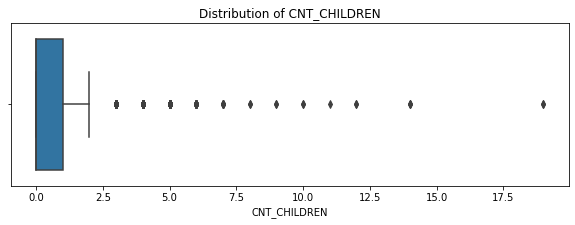

In [20]:
outlier('CNT_CHILDREN')

If we just look at the above figure we can clearly see that there is one observation with value 19. So, we consider this as an outlier.

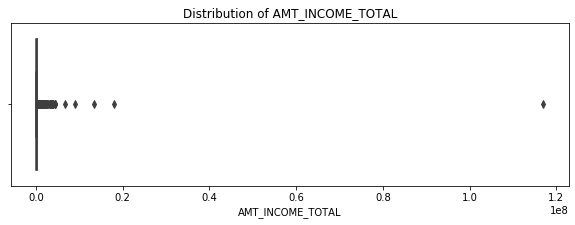

In [21]:
outlier('AMT_INCOME_TOTAL')

The maximum amount in this column is very much away from the 75th percentile as well as from mean, thus we are considering it as an outlier.

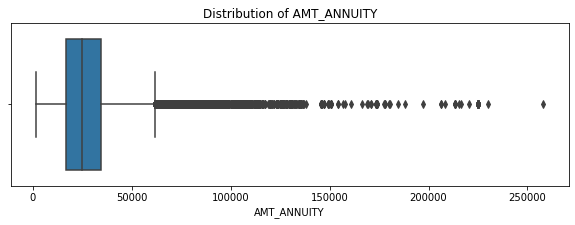

In [22]:
outlier('AMT_ANNUITY')

The variation between 75th percentile and maximum amount clearly visible from the above plot, so these are outliers for this data.

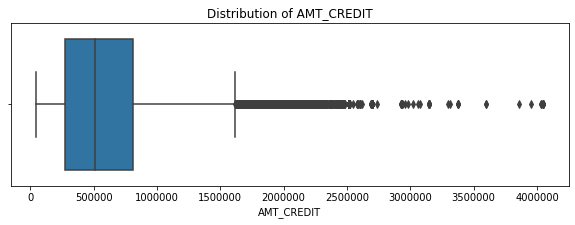

In [23]:
outlier('AMT_CREDIT')

The above boxplot for Amount Credit also contains outliers as the values are very far away even from 99th percentile, these are such outliers ahich are actually very important for our data, we just cannot ignore them. 

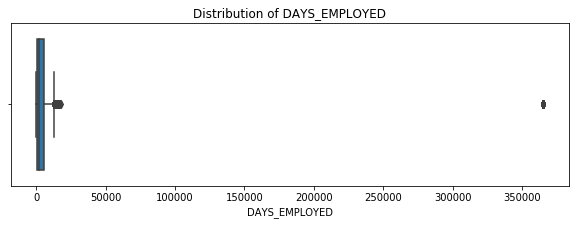

In [24]:
outlier('DAYS_EMPLOYED')

From the abpove plot, we can easily visualize that there is only one value 365243, which is far away from rest of the data, this might be an error so we consider this as an outlier.

**Binning Continuous Variable**

In [25]:
#Creating bins for Credit amount

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins=bins,labels=slots)

In [26]:
# Creating bins for income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [27]:
# Creating bins for days_birth

bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

df1['AGE_RANGE']=pd.cut(df1['DAYS_BIRTH'],bins,labels=slot)

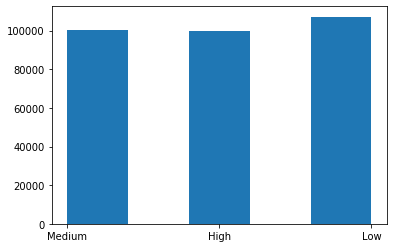

In [28]:
plt.hist('AMT_CREDIT_RANGE',bins=5, data=df1)
plt.show()

In [29]:
#Checking bin columns created in df.
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,Low,50-60


# Checking the imbalance Percentage

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


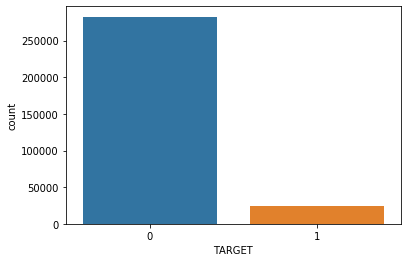

In [30]:
# Calculating Imbalance percentage
print(100*(df1.TARGET.value_counts())/ (len(df1)))
sns.countplot('TARGET',data=df1)
plt.show()

So, TARGET column has 8.07% of 1's which means 8% clients have payment difficulties and 91.92% are having no difficulties. 


In [31]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target_1 = df1[df1['TARGET']==1]
target_0 = df1[df1['TARGET']==0]

# Univariate Analysis for target = 0 and target = 1


**1. CATEGORICAL VARIABLE**

In [32]:

def uniplot(var):
     plt.figure(figsize=(15,5))
     plt.subplot(1, 2, 1)
     plt.ylim(0,100000)
     sns.countplot(var, data=target_0 )
     plt.title('TARGET 0')
     plt.xlabel(var)
     plt.xticks(rotation=90)
     plt.subplot(1, 2, 2)
    
     sns.countplot(var, data= target_1)
     plt.ylim(0,100000)   
     plt.title('TARGET 1')
     plt.xlabel(var)
     plt.xticks(rotation=90)

     plt.show()


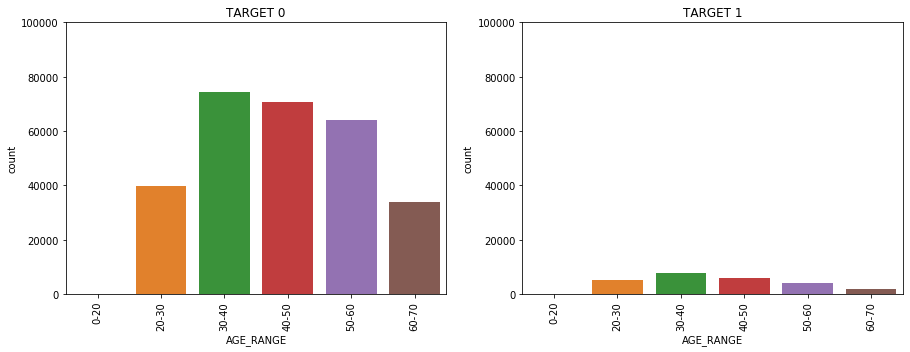

In [33]:
uniplot("AGE_RANGE")

We can observe that customers belonging to age group 30-40 are able to make payment on time and can be considered while lending loan!
The customers from 40 to 60 age can also be considered but after 60 we can see the certain decrease, so age factor matter for lending.

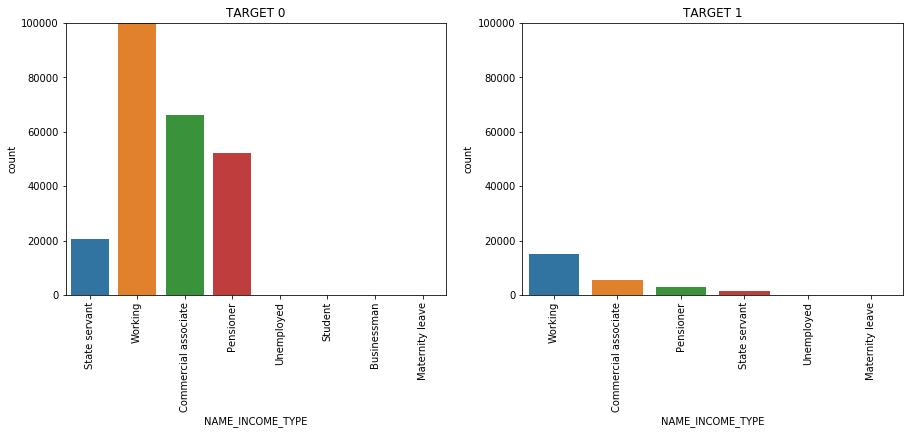

In [34]:
uniplot("NAME_INCOME_TYPE")

The plot clearly shows that working are most likely to make payment on time which is true only the person who is earning will return the credit whereas unemployed,student are less likely to make payment on time.

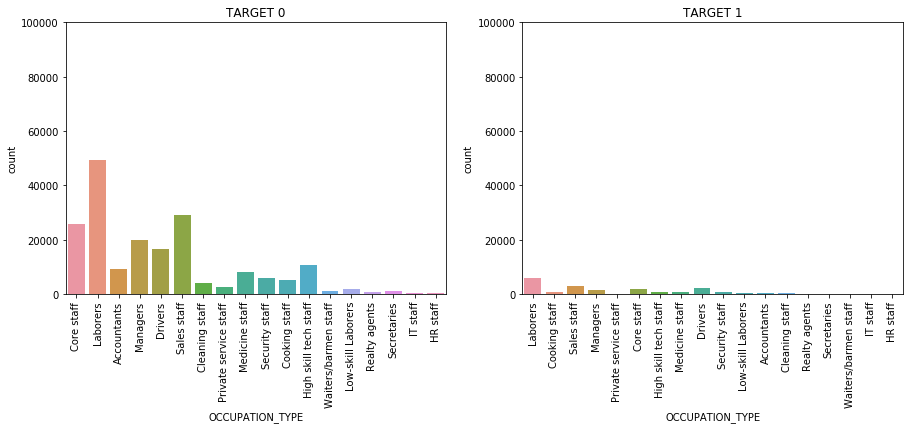

In [35]:
uniplot('OCCUPATION_TYPE')

The above plot clearly shows that labourers are most likely to make payment on time followed by sales staff whereas HR staff are less likely to make payment on time. So, occupation do matters for crediting loan.

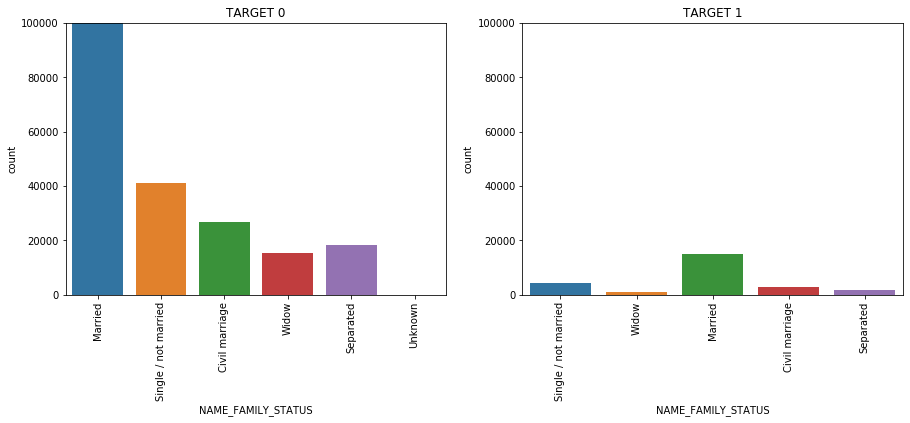

In [36]:
uniplot('NAME_FAMILY_STATUS')

The married are most likely to make payment on time where as ratio of widows returning the loan compared to other is very less. 

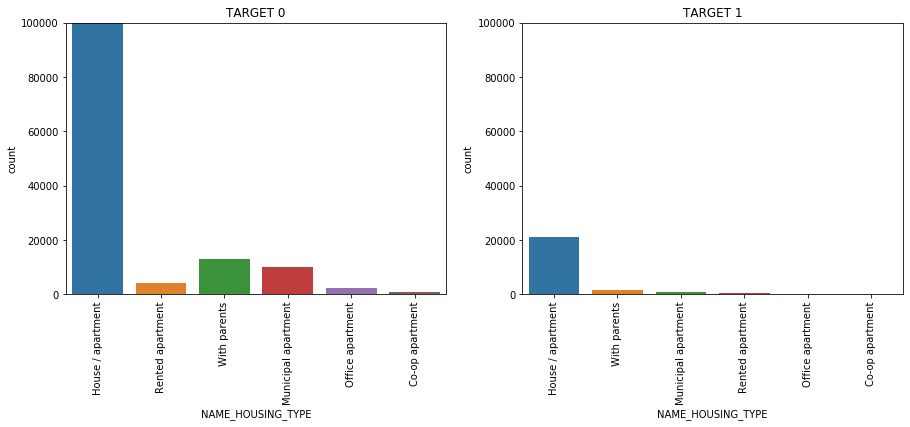

In [37]:
uniplot("NAME_HOUSING_TYPE")

Customers having house/apartment are most likely to make payment.

**2. Continuous Variable**

In [38]:
def uni_2(var):

    sns.distplot(target_0[var], hist = False, label="TARGET 0")# Target = 0
    sns.distplot(target_1[var], hist = False, label='TARGET 1')# Taget = 1
    plt.title(var +' FOR TARGET 0 AND TARGET 1 \n')
    plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
    plt.show()

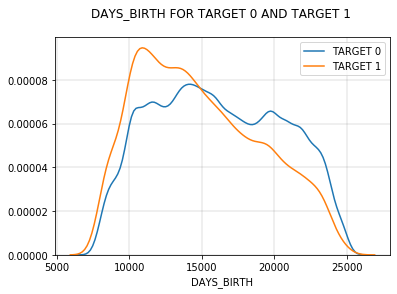

In [39]:
uni_2('DAYS_BIRTH')

From the above plot, we can clearly see that people within the range age 20-30 are less likely to pay loan on time while this ratio decreases with increasing age. 

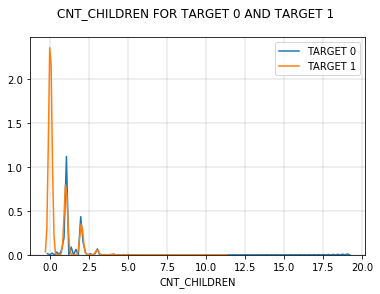

In [40]:
uni_2('CNT_CHILDREN')

This plot says people most likely to go for loan are not having children and also in Non-defaulters category, while if the count of children increases then loan payment chances becomes less, distribution of income among the family members increased.

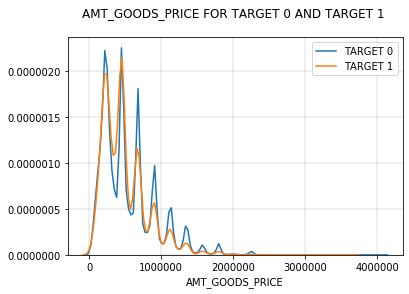

In [41]:
uni_2('AMT_GOODS_PRICE')

From the above plot, we can see that for this column "AMT_GOODS_PRICE" there are more defaulters for lesser price of goods and as the amount goods prices increases the ratio of defaulters decreases. 

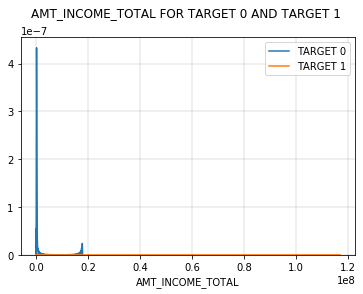

In [42]:
uni_2('AMT_INCOME_TOTAL')

From the "AMT_INCOME_TOTAL", it can be clearly seen that lower income clients comes under defaulters category.

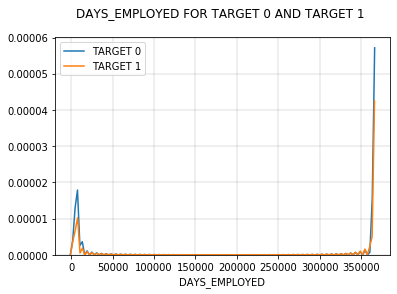

In [43]:
uni_2('DAYS_EMPLOYED')

From the above plot we can see that the ratio of non-defaulters is higher than defaulters with respect to number of days employed.


# Bivariate Analysis for target = 0 and target = 1

**3. Continuous-Continuous Variable**

In [44]:
def biplot(var1,var2):
    
    plt.figure(figsize=(18,5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var1,y=var2,data=target_0)
    plt.title('TARGET=0\n '+ var1 + " V/S " + var2)
    plt.xlabel(var1)
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=var1,y=var2,data=target_1)
    plt.title('TARGET=1\n '+ var1 + " V/S " + var2)
    plt.xlabel(var1)
    plt.xticks(rotation=90)
    plt.show()

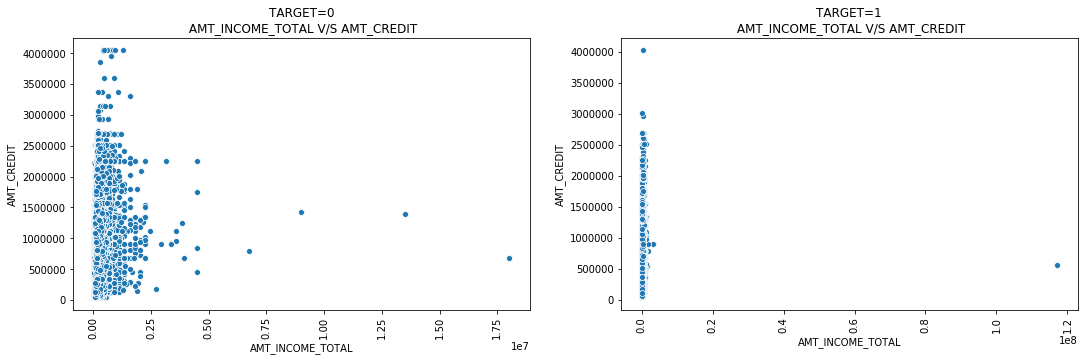

In [45]:
biplot('AMT_INCOME_TOTAL','AMT_CREDIT')

Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.

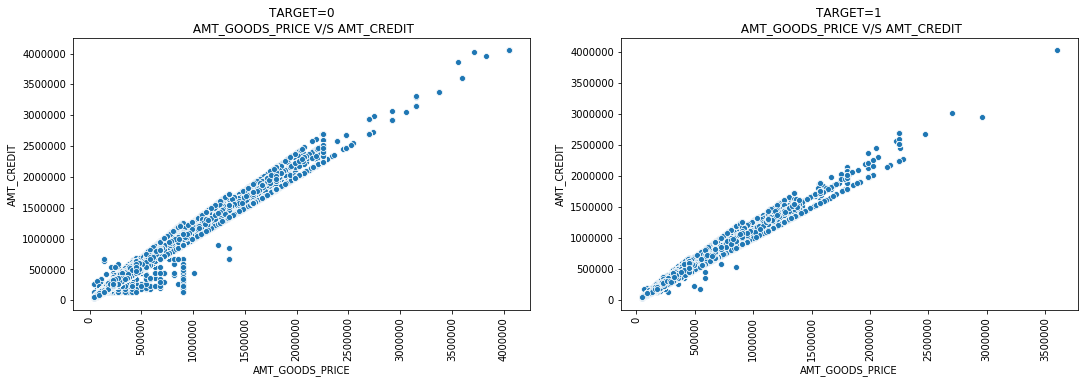

In [46]:
biplot('AMT_GOODS_PRICE','AMT_CREDIT')

People who have higher goods price and get the higher credit for both the cases non defaulters and defaulters.

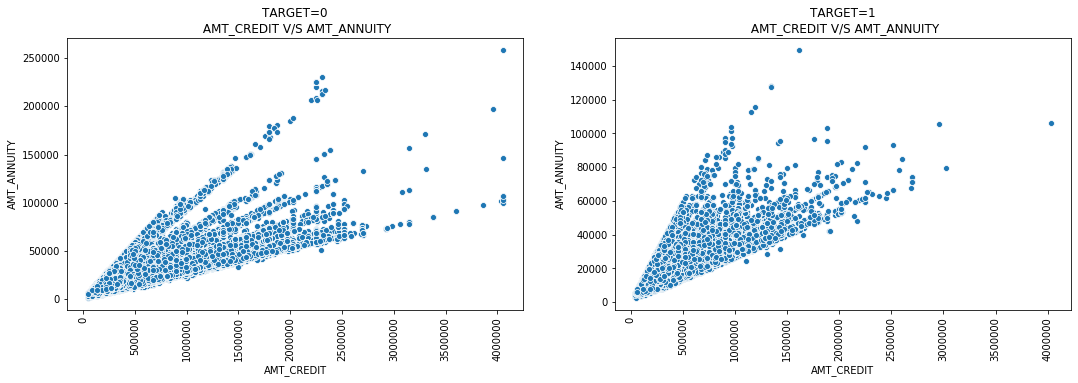

In [47]:
biplot('AMT_CREDIT','AMT_ANNUITY')

We can see that the range of amount annuity for defaulters and non- defaulters are quite different. The customers with higher amount of annuity range are more likely to come under defaulters category. 

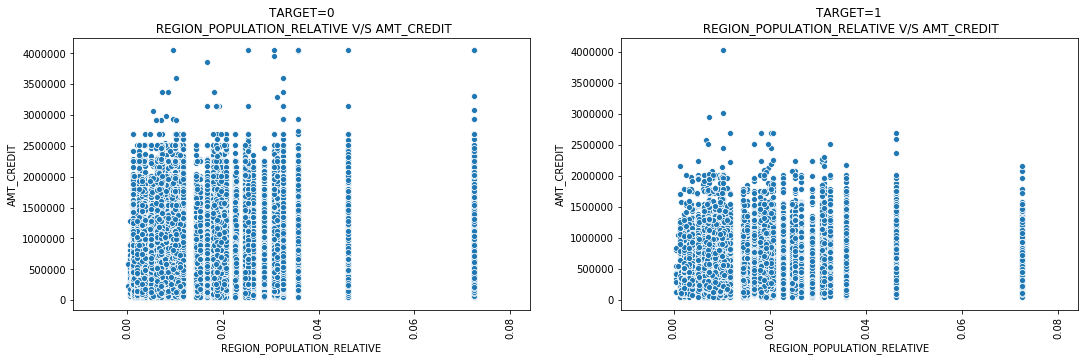

In [48]:
biplot('REGION_POPULATION_RELATIVE','AMT_CREDIT')

People who lives in higher populated regions have higher number of credits and are more likely to repay the loan.

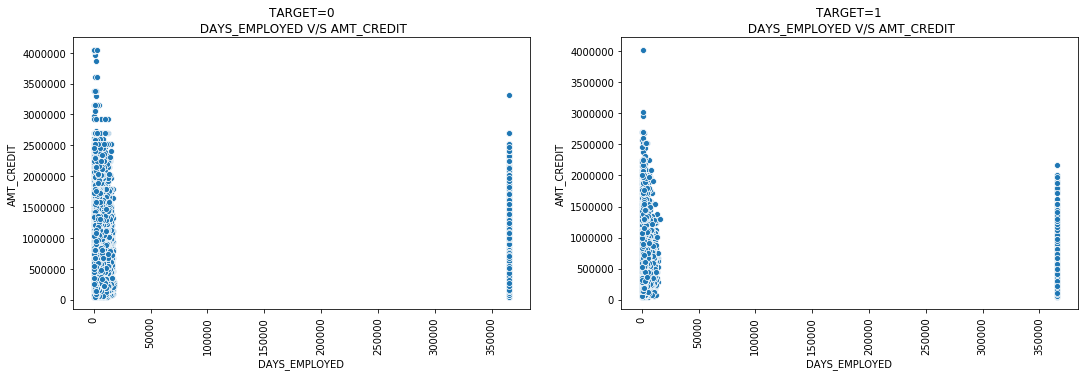

In [49]:
biplot('DAYS_EMPLOYED','AMT_CREDIT')

DAYS EMPLOYED does not show any correlation with AMT CREDIT means if the client is employed he/she will get the credit up to any range

**4. Numerical-Categorical**

In [50]:
def bi_nc(var1,var2):
    plt.figure(figsize = (15, 5))
    plt.subplot(1,2,1)
    sns.boxplot(x=var1, y=var2,  data=target_0)
    plt.title('Target_0\n '+ var1 + ' V/S ' + var2)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.xticks(rotation=45)
    plt.subplot(1,2,2)
    sns.boxplot(x=var1, y=var2, data=target_1)
    plt.title('Target_1\n '+ var1 + ' V/S ' + var2)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.xticks(rotation=45)
    plt.show()

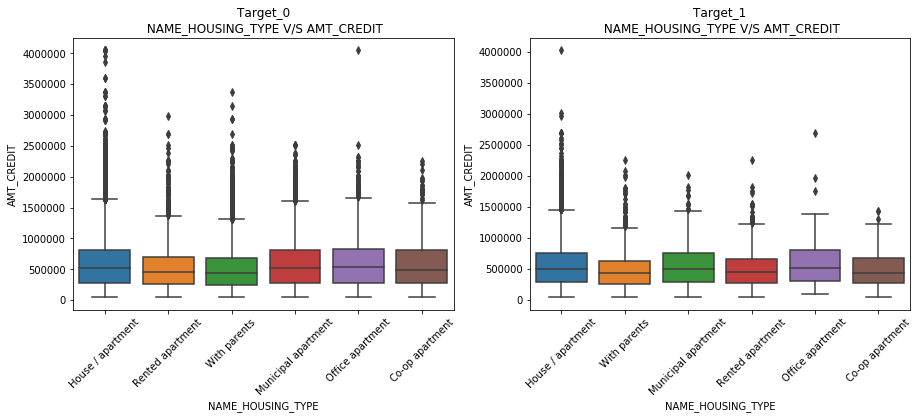

In [51]:
bi_nc('NAME_HOUSING_TYPE','AMT_CREDIT')

From the graph we can see that the client who owns a house have the greater amount credit followed by office apartment, who gets almost similar credits. 

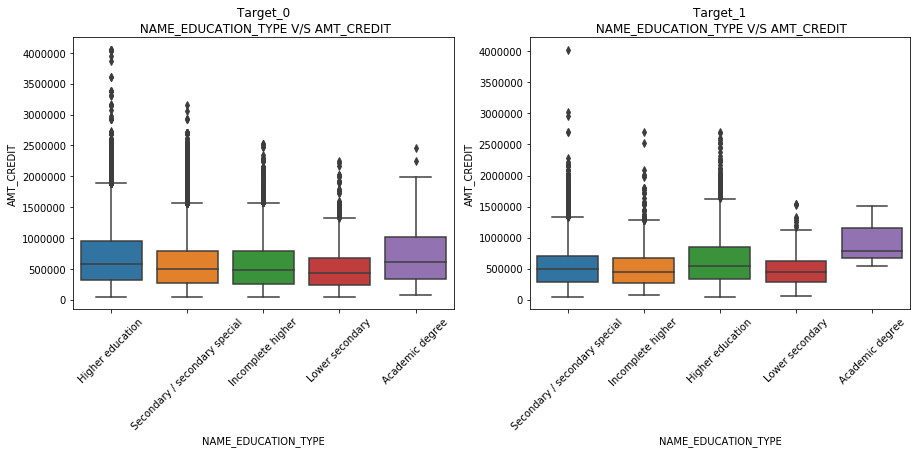

In [52]:
bi_nc('NAME_EDUCATION_TYPE','AMT_CREDIT')

The above graphs clears that education can also be considered as an important factor as well as an reliable factor too. The median value for amount credit in case of academic degree is greater than rest of the others and also it is followed by higher education.

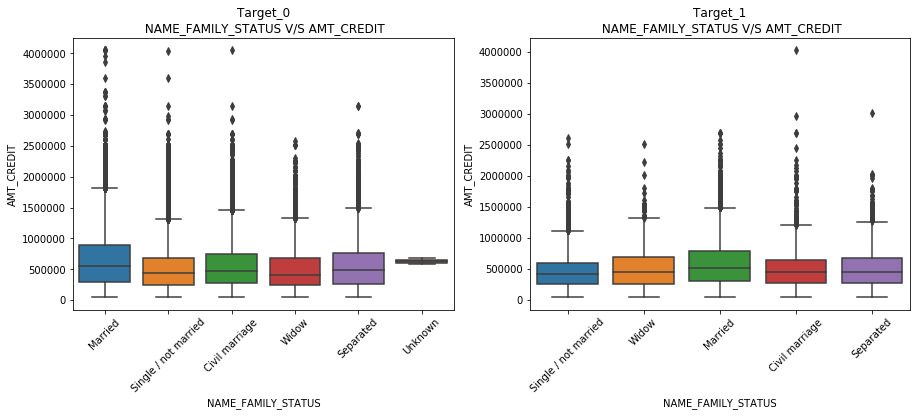

In [53]:
bi_nc('NAME_FAMILY_STATUS','AMT_CREDIT')

If we consider the family status, we can see that single/not married amount credit is less than the other categories.

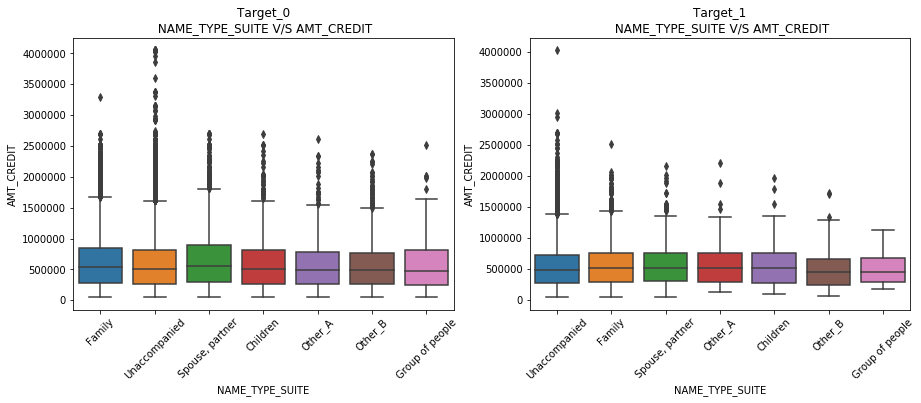

In [54]:
bi_nc('NAME_TYPE_SUITE','AMT_CREDIT')

From the above plot, we can easily visualize that approval of loan do not need any accompanied person with them.

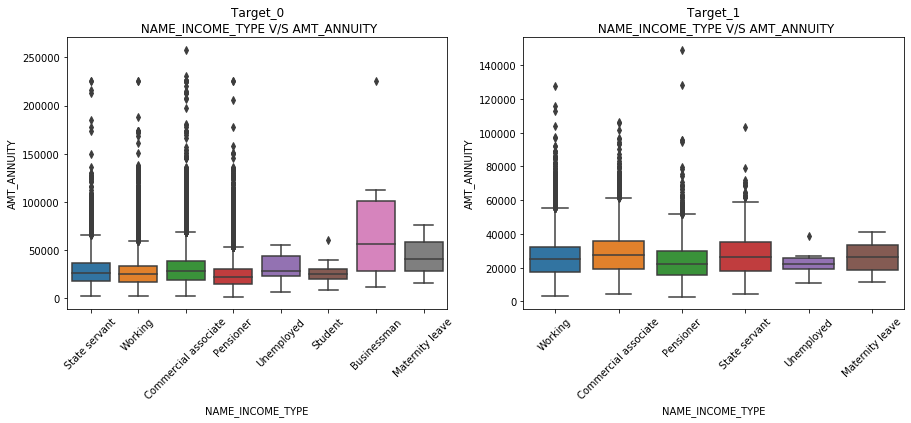

In [55]:
bi_nc('NAME_INCOME_TYPE','AMT_ANNUITY')

From the above plot it is clear that amount annuity is very high for businessman where as very low for the student also these two do not comes under the target_1.

**5. Categorical-Categorical**

In [56]:
def catplot(var1,var2):
    plt.figure(figsize=(18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=var1,hue=var2,data=target_0)
    plt.title('FOR NON DEFAULTERS\n '+ var1 +' and '+ var2)
    plt.xlabel(var1)
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    sns.countplot(x=var1, hue=var2,data=target_1)
    plt.title('DEFAULTERS\n '+ var1 +' and '+ var2)
    plt.xlabel(var1)
    plt.xticks(rotation=45)
    plt.show()

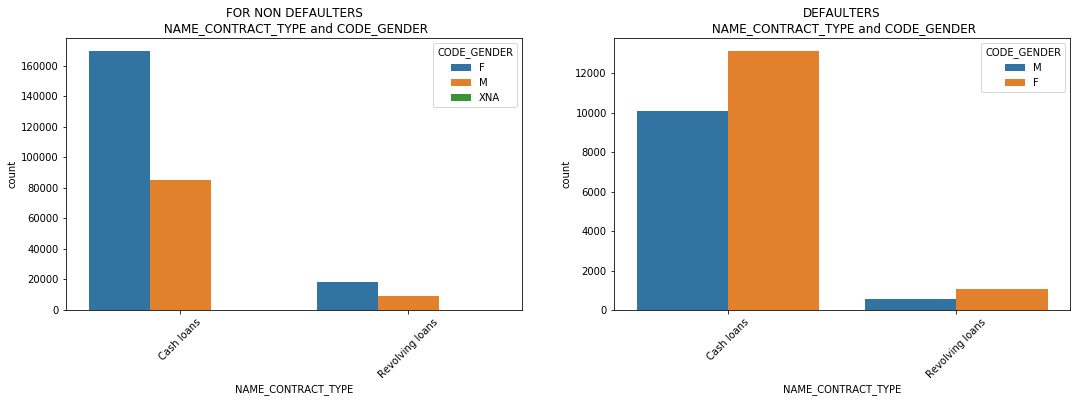

In [57]:
catplot('NAME_CONTRACT_TYPE','CODE_GENDER')

From both the plots we can visualize that cash loan count is higher for both the dataframes and also females ratio is more than males for both data frames.

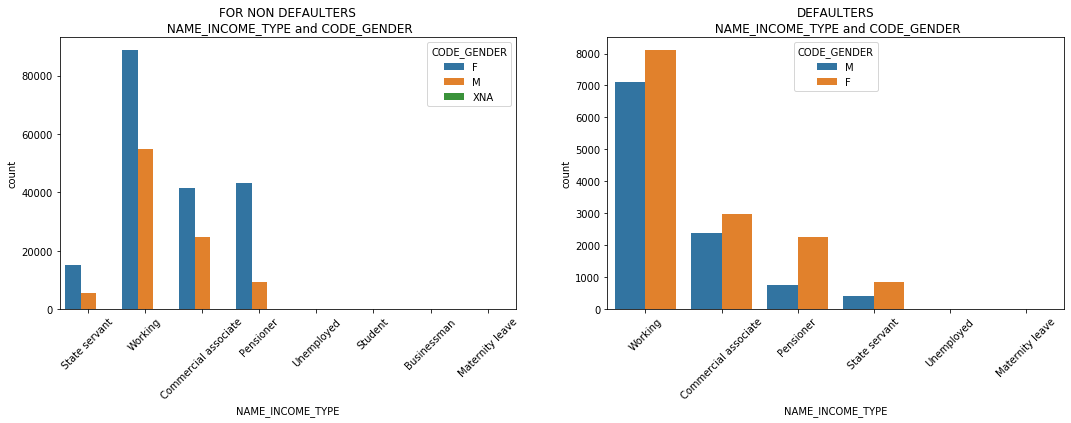

In [58]:
catplot('NAME_INCOME_TYPE','CODE_GENDER')

From the above plots we can clearly seen that the count of working client is higher than the other category, followed by pensioners in non defaulter case but for defaulters plots it is followed by commercial associate.

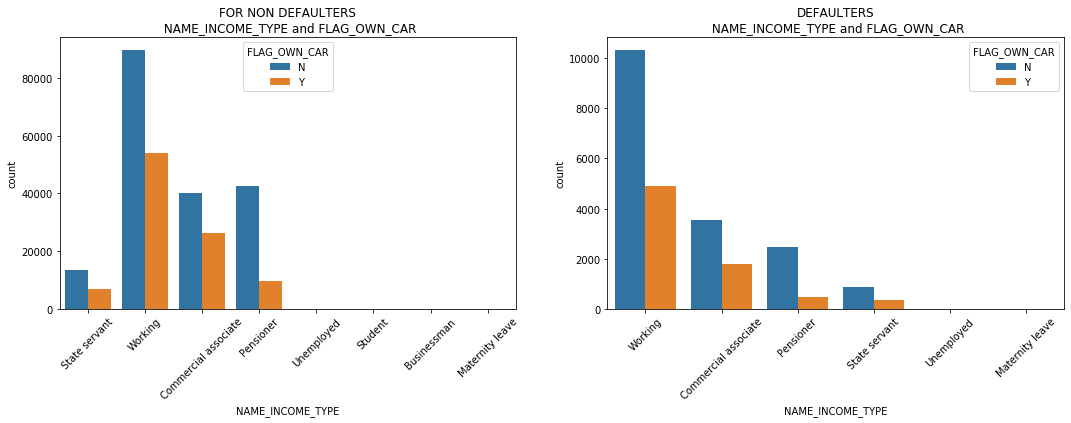

In [59]:
catplot('NAME_INCOME_TYPE','FLAG_OWN_CAR')

The count for the people who owns a car is less than the people who don't have the car, also ratio of working people is higher than the other categories where stae servant are less likely to apply for the credit if we just go with the numbers.

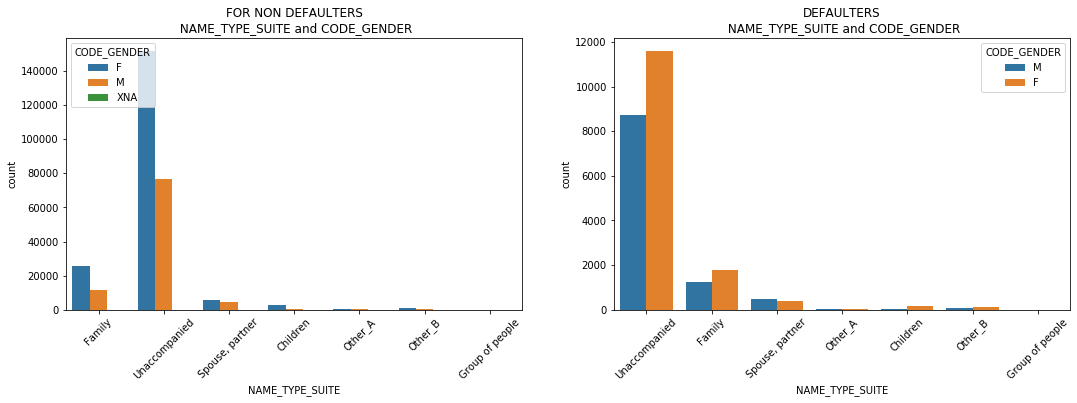

In [60]:
catplot('NAME_TYPE_SUITE','CODE_GENDER')

Seeing the above plots, we can say that people don't like to accompanied by anyone while applying for the loan, so the count for the unaccompanied column is higher than the others.

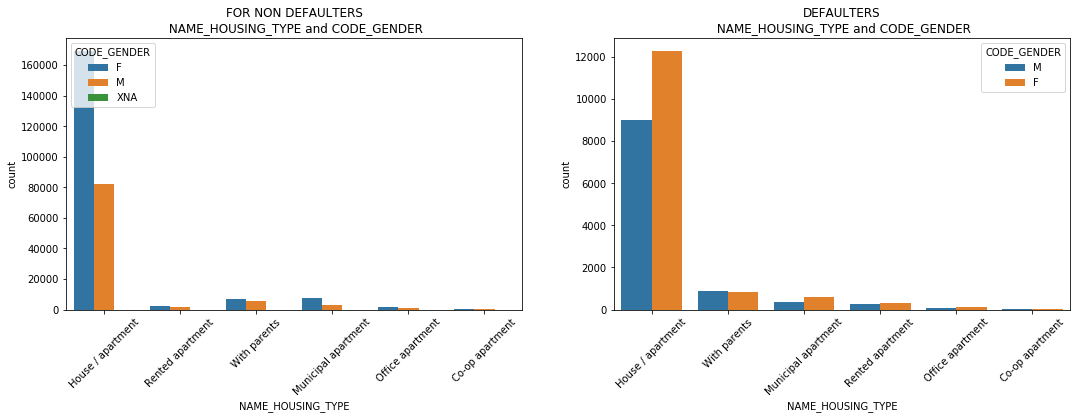

In [61]:
catplot('NAME_HOUSING_TYPE','CODE_GENDER')

The person having house is more likely to applying for the credit, where as Co-op apartment persons are least in number in applying for the credit. 

# Top 10 correlation 

In [62]:
#plotting the above correlation with heat map as it is the best choice to visulaize

target0_corr_data=target_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]
target1_corr_data=target_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]
target0_corr=target0_corr_data.corr(method='pearson')
target1_corr=target1_corr_data.corr(method='pearson')

In [63]:
#correlation for target0
target0_corr

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
AMT_INCOME_TOTAL,1.000000,0.342799,0.418953,0.349462,-0.062609,-0.140392,0.027397,0.034231,-0.186573,-0.200466
AMT_CREDIT,0.342799,1.000000,0.771309,0.987250,0.047378,-0.070104,0.003081,0.064534,-0.103337,-0.112238
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776686,-0.012263,-0.104978,0.020905,0.075781,-0.132128,-0.145153
AMT_GOODS_PRICE,0.349462,0.987250,0.776686,1.000000,0.044565,-0.068609,-0.000525,0.062814,-0.104382,-0.112601
DAYS_BIRTH,-0.062609,0.047378,-0.012263,0.044565,1.000000,0.626114,-0.336966,-0.285805,-0.002332,-0.000780
DAYS_EMPLOYED,-0.140392,-0.070104,-0.104978,-0.068609,0.626114,1.000000,-0.245174,-0.238288,0.038328,0.040461
CNT_CHILDREN,0.027397,0.003081,0.020905,-0.000525,-0.336966,-0.245174,1.000000,0.878563,0.022842,0.021866
CNT_FAM_MEMBERS,0.034231,0.064534,0.075781,0.062814,-0.285805,-0.238288,0.878563,1.000000,0.027873,0.028657
REGION_RATING_CLIENT,-0.186573,-0.103337,-0.132128,-0.104382,-0.002332,0.038328,0.022842,0.027873,1.000000,0.950149
REGION_RATING_CLIENT_W_CITY,-0.200466,-0.112238,-0.145153,-0.112601,-0.000780,0.040461,0.021866,0.028657,0.950149,1.000000


In [64]:
#correlation for target 0
target1_corr

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037583,-0.003096,-0.014977,0.004796,0.006654,-0.021486,-0.022808
AMT_CREDIT,0.038131,1.000000,0.752195,0.983103,0.135316,0.001930,-0.001675,0.051224,-0.059193,-0.071377
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752699,0.014303,-0.081207,0.031257,0.075711,-0.073784,-0.089291
AMT_GOODS_PRICE,0.037583,0.983103,0.752699,1.000000,0.135810,0.006642,-0.008112,0.047388,-0.066390,-0.077191
DAYS_BIRTH,-0.003096,0.135316,0.014303,0.135810,1.000000,0.582185,-0.259109,-0.203267,-0.033928,-0.033631
DAYS_EMPLOYED,-0.014977,0.001930,-0.081207,0.006642,0.582185,1.000000,-0.192864,-0.186515,0.003490,0.002888
CNT_CHILDREN,0.004796,-0.001675,0.031257,-0.008112,-0.259109,-0.192864,1.000000,0.885484,0.040680,0.043185
CNT_FAM_MEMBERS,0.006654,0.051224,0.075711,0.047388,-0.203267,-0.186515,0.885484,1.000000,0.043652,0.047883
REGION_RATING_CLIENT,-0.021486,-0.059193,-0.073784,-0.066390,-0.033928,0.003490,0.040680,0.043652,1.000000,0.956637
REGION_RATING_CLIENT_W_CITY,-0.022808,-0.071377,-0.089291,-0.077191,-0.033631,0.002888,0.043185,0.047883,0.956637,1.000000


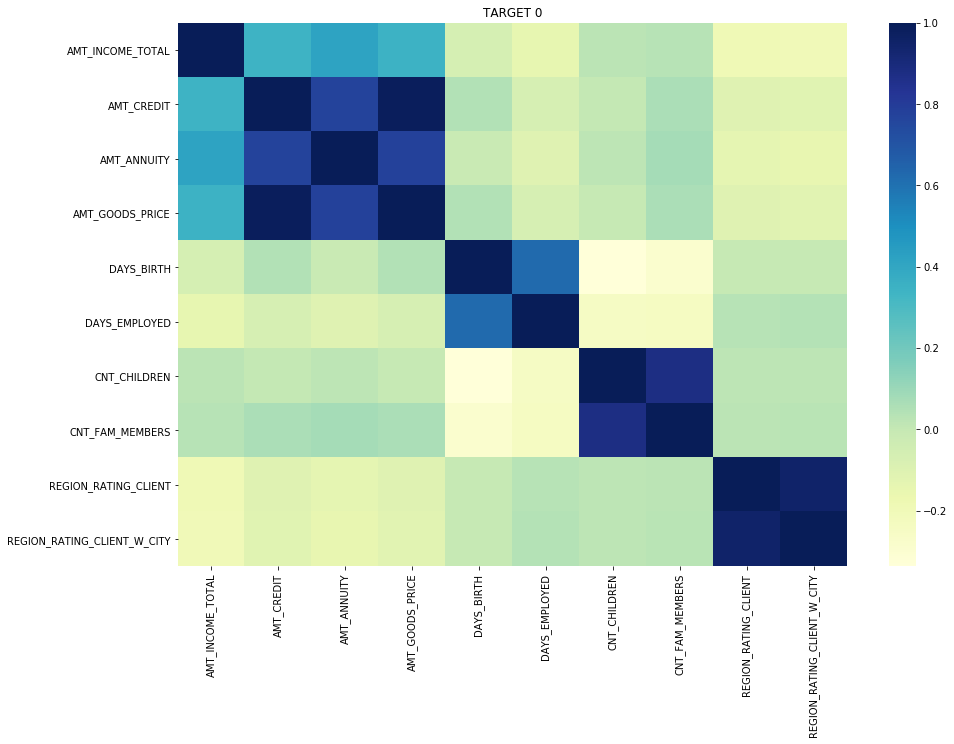

In [65]:
plt.figure(figsize=[15,10])
sns.heatmap(target0_corr,cmap='YlGnBu',annot=False)
plt.title('TARGET 0')
plt.show()

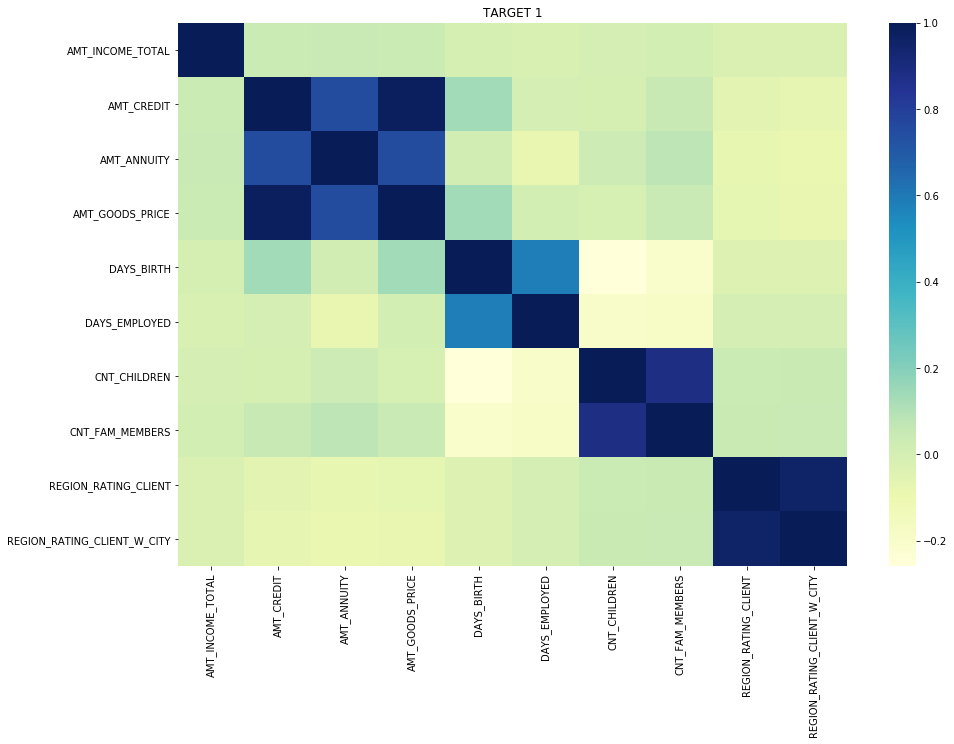

In [66]:
plt.figure(figsize=[15,10])
sns.heatmap(target1_corr,annot=False,cmap='YlGnBu')
plt.title('TARGET 1')
plt.show()

*Conclusion:*
From the correlation tables and heat map we can clearly see that correlation between the variables is same for both the data frames target_0 and target_1. Also we had negative correlation between CNT_CHILDREN and DAYS_BIRTH and a very nice positive correlation between AMT_CREDIT and AMT_GOODS_PRICE.

### PREVIOUS DATA APPLICATION ANALYSIS

#### read the csv file

In [67]:
df2 = pd.read_csv('previous_application.csv')

In [68]:
# check the head of file
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# check the shape of file
df2.shape

(1670214, 37)

In [70]:
#check the info of file
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### UNIVARIATE ANALYSIS

**1. FOR CATEGORICAL VARIABLE**

In [71]:
def univplot(var):
     plt.figure(figsize=(8,5))
     
     sns.countplot(var,data=df2,hue = 'NAME_CONTRACT_STATUS')
     plt.xlabel(var)
     plt.yscale('log')
     plt.xticks(rotation=90)
     plt.title(var)
      
     plt.show()

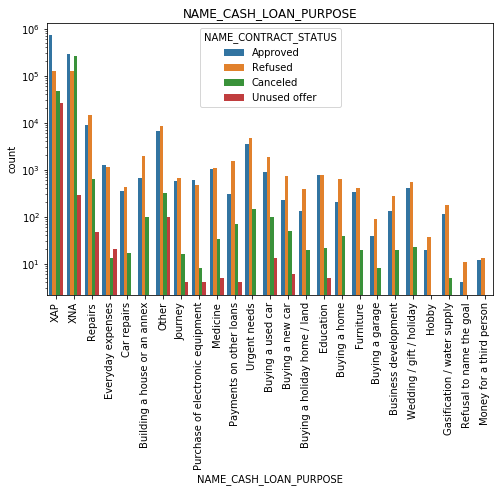

In [72]:
univplot('NAME_CASH_LOAN_PURPOSE')

 1.Refusal rate is high as comapared to other for most of the purposes except a few like purchase of electronic equipment, here the approval rate is high.

 2.For education purposes we have equal number of approval and refusal.
 
 3.Refusal is almost double when name of the goal is not mentioned.
 
 4.Paying other loans and buying a new car is having significant higher refusal than approval.

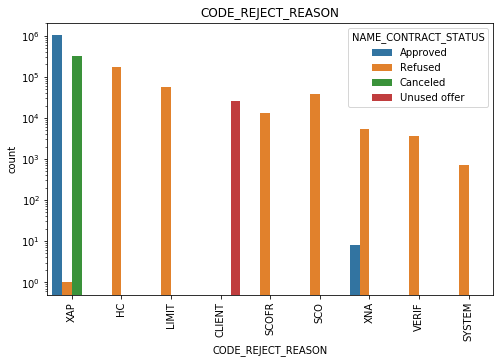

In [73]:
univplot('CODE_REJECT_REASON')

 We can see that reason for refusal of previous application is significantly high for HC followed by SCO. 

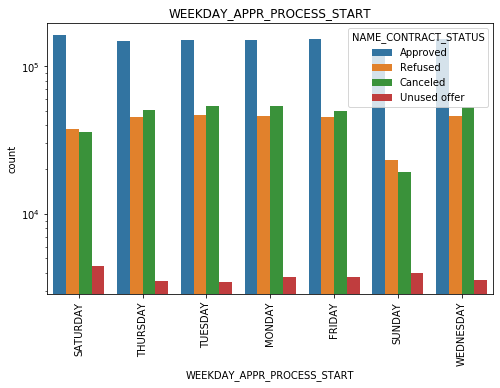

In [74]:
univplot('WEEKDAY_APPR_PROCESS_START')

The approval rate is fairly high throughout the week, and almost double for SUNDAY as the refusal and cancellation is less on SUNDAY.

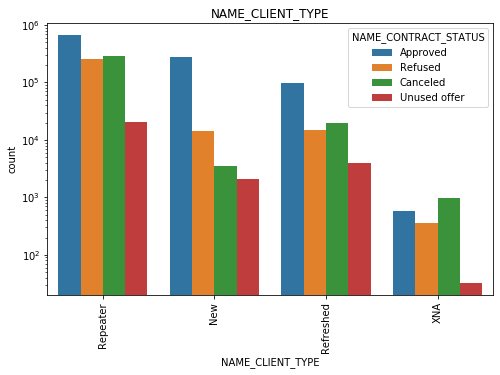

In [75]:
univplot('NAME_CLIENT_TYPE')

From the above graph, we can see that although the approval of application is high for all the category, but refusal rate of new applicants is less as compared to approval among all the categories.

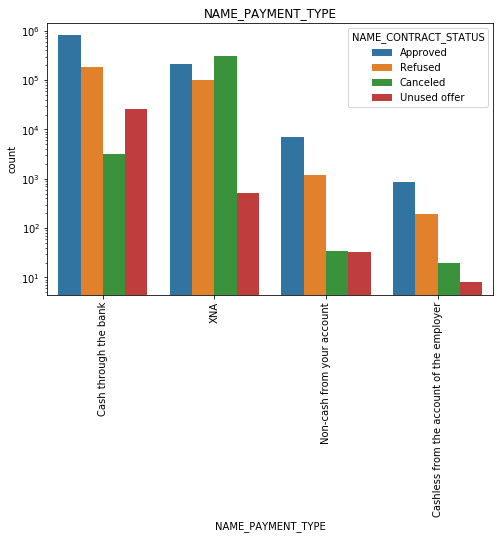

In [76]:
univplot('NAME_PAYMENT_TYPE')

From the above plot, we can visualize that the CASH_through_the_bank is most likely payment type prefer by the client.

**2. For Continuous Variable**

In [77]:
# Dividing dataset to 4 categories
approved = df2.loc[df2["NAME_CONTRACT_STATUS"]=='Approved']
canceled = df2.loc[df2["NAME_CONTRACT_STATUS"]=='Canceled']
refused  = df2.loc[df2["NAME_CONTRACT_STATUS"]=='Refused']
unused  =  df2.loc[df2["NAME_CONTRACT_STATUS"]=='Unused offer']

In [78]:
def contplot(var):
    plt.figure(figsize=[8,4])
    sns.distplot(approved[var],hist = False,label = 'APPROVED')
    sns.distplot(canceled[var],hist = False,label = 'CANCELED')
    sns.distplot(refused[var],hist = False,label = 'REFUSED')
    plt.show()

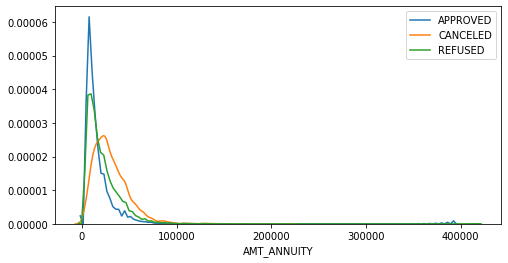

In [79]:
contplot('AMT_ANNUITY')

From the AMT_ANNUITY graph we can conclude that count of approval of application is quite high below the annuity range of 30,000 after that it gradually decreases and also the cancellation count of application increase for the annuity range above 40,000.

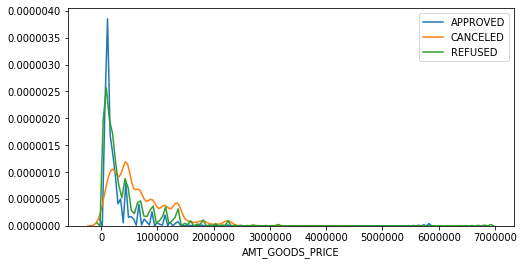

In [80]:
contplot('AMT_GOODS_PRICE')

The approval rate is quite high when AMT_GOODS_PRICE is below the range of 5,00,000, after this point cancellation and refusal of application is higher than approval.

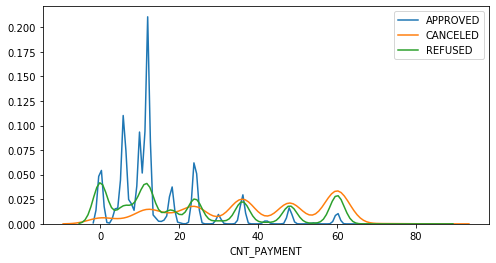

In [81]:
contplot('CNT_PAYMENT')

From the above plot, we can see that approval application count is for the range (5-30) after this when count of payment increases cancellation and refusal count also increases compared to approval.  

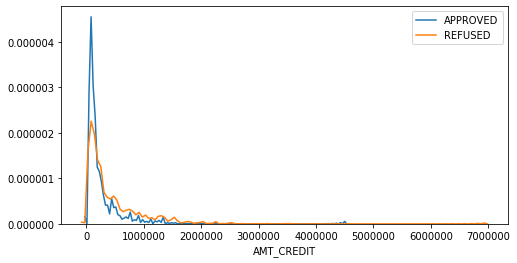

In [82]:
# for AMT_CREDIT
plt.figure(figsize=[8,4])
sns.distplot(approved['AMT_CREDIT'],hist = False,label = 'APPROVED')
sns.distplot(refused['AMT_CREDIT'],hist = False,label = 'REFUSED')
plt.show()

In AMT_CREDIT plot, we can see that when the credit amount increases over 5,00,000 the refusal of application count increases.

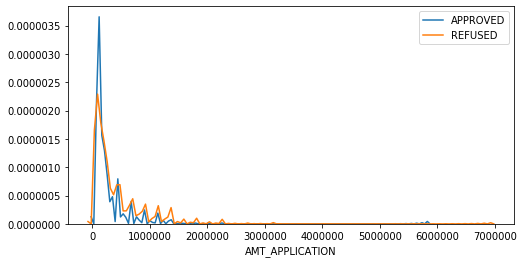

In [83]:
# for AMT APPLICATION
plt.figure(figsize=[8,4])
sns.distplot(approved['AMT_APPLICATION'],hist = False,label = 'APPROVED')
sns.distplot(refused['AMT_APPLICATION'],hist = False,label = 'REFUSED')
plt.show()

This graph shows that count of approval of application is high when the AMT_APPLICATION range is less than 5,00,000 and for higher amount refusal count increases.

##  BIVARIATE ANALYSIS

**3. For Continuous-Continuous Variable**

In [84]:
def bivplot(vari1,vari2):
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.scatterplot(x=vari1,y=vari2,data = approved)
    plt.title( 'APPROVED')
    plt.xlabel(vari1)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.scatterplot(x=vari1,y=vari2,data = refused)
    plt.title('REFUSED')
    plt.xlabel(vari1)
    plt.xticks(rotation=90)
    plt.show

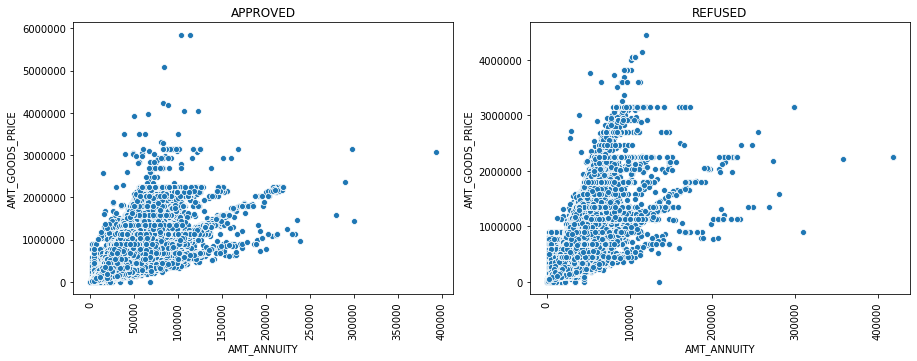

In [85]:
bivplot('AMT_ANNUITY','AMT_GOODS_PRICE')

This graph clearly shows that there is moderate positive correlation betweein these two variables as for increase in AMT_GOODS_PRICE, AMT_ANNUITY also increases.

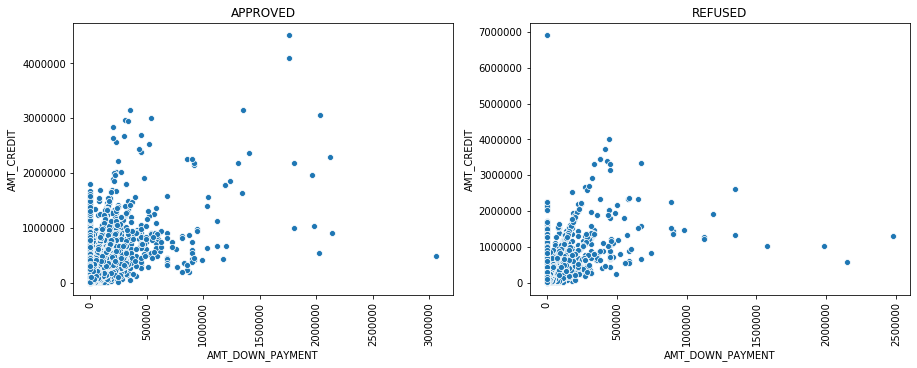

In [86]:
bivplot('AMT_DOWN_PAYMENT','AMT_CREDIT')

From the graph, we can easily seen that AMT_CREDIT and AMT_DOWN_PAYMENT is also having a positive correlation, and also in some cases there is no down payment amount with respect to credit as seen ion the graph.

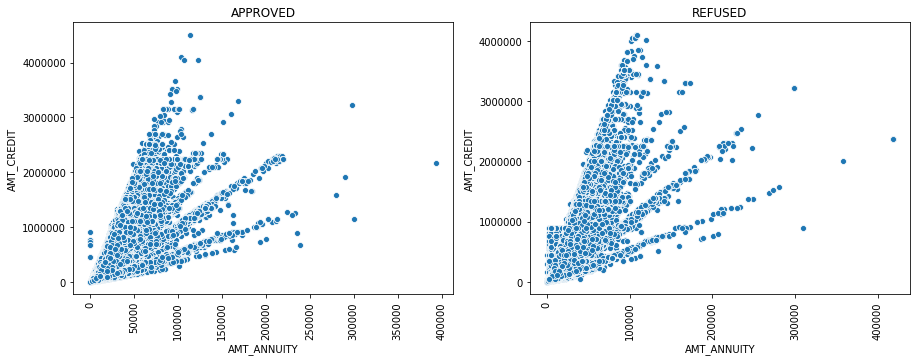

In [87]:
bivplot('AMT_ANNUITY','AMT_CREDIT')

This graph also shows a positive correlation between the variables, as the increase in AMT_CREDIT also results in increase of AMT_ANNUITY. 

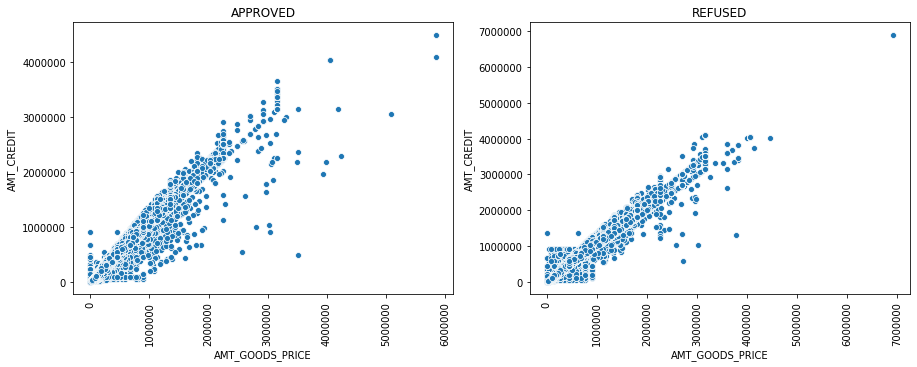

In [88]:
bivplot('AMT_GOODS_PRICE','AMT_CREDIT')

These two variables are having a moderate high correlation between them, which is fairly right because as the amount of goods price increase this results in increase in the amount of credit.

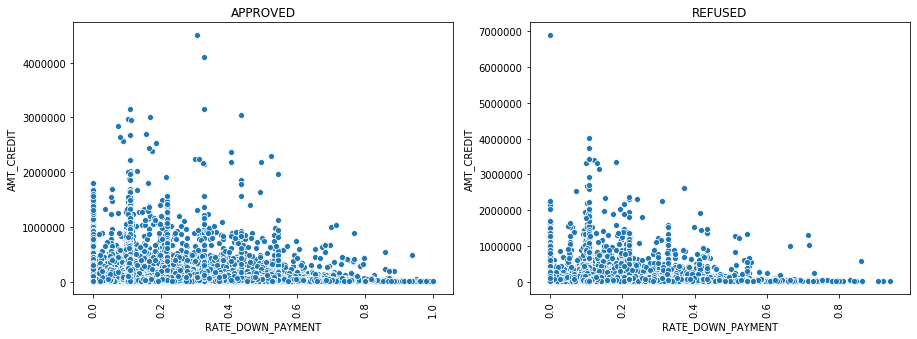

In [89]:
bivplot('RATE_DOWN_PAYMENT','AMT_CREDIT')

In above graph, there is no correlation between these two variables as the down payment rate varies for different applicants.

**4. For Numerical Categorical**

In [90]:
def biplo(var):
    plt.figure(figsize = (10, 5))
    sns.boxplot(x='NAME_CONTRACT_STATUS', y=var,  data=df2)
    plt.title('NAME_CONTRACT_STATUS V/S ' + var)
    plt.xlabel('NAME_CONTRACT_STATUS')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.show()

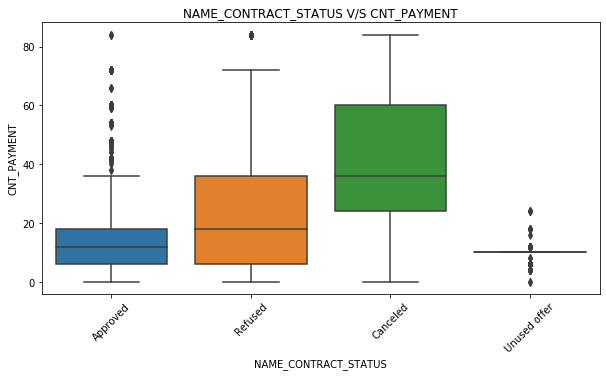

In [91]:
biplo('CNT_PAYMENT')

From the above plot we can clearly see that if the count of payment increases, the chance of refusal and cancellation of application also increases.

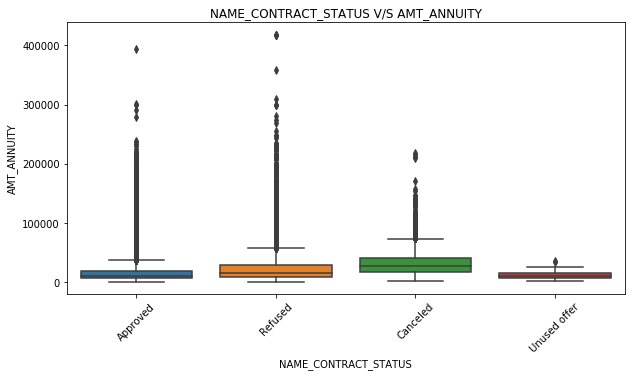

In [92]:
biplo('AMT_ANNUITY')

In AMT_ANNUITY with respect to NAME_CONTRACT_STATUS most of the application are refused and cancelled for higher amount of annuity, the reason may be that people offer higher annuity but if they are unable to pay then risk rate for bank becomes high.

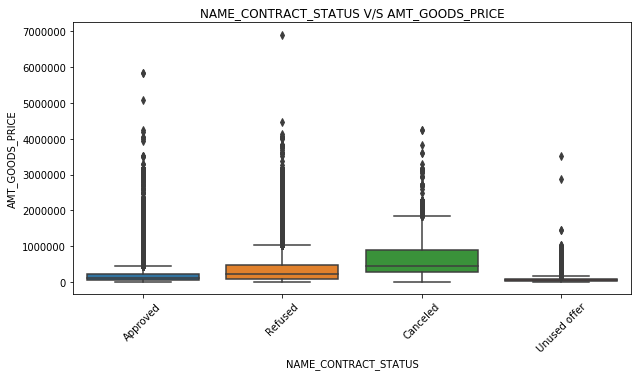

In [93]:
biplo('AMT_GOODS_PRICE')

From above plot we can see that even for higher AMT_GOODS_PRICE most of the application got refused and rejected, thus AMT_GOODS_PRICE is necessary but not sufficient to get credit through bank.

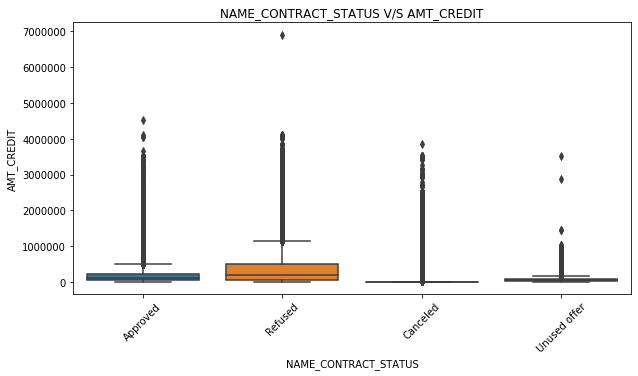

In [94]:
biplo('AMT_CREDIT')

From this plot, we conclude that higher credit amount is mostly refused by the bank.

In [95]:
df2['DAYS_DECISION'] = df2['DAYS_DECISION'].abs()

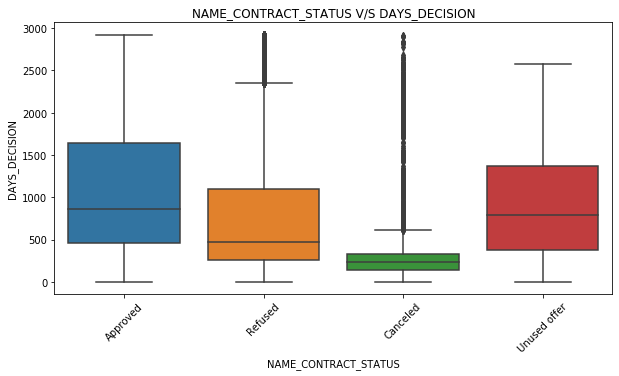

In [96]:
biplo('DAYS_DECISION')

From the above graph we can see that approval for the current application was made only after 500 days from the previous application, if client has applied for the loan with in 500 days, the cancellation of application is more follwing the refusal also.

**5. For Categorical Categorical**

In [97]:
def cateplot(var1):
    plt.figure(figsize=(8,5))
    sns.countplot (x='NAME_CONTRACT_STATUS',data = df2,hue = var1)
    plt.title('NAME_CONTRACT_STATUS and ' + var1)
    plt.xticks(rotation=45)
  
    plt.show()

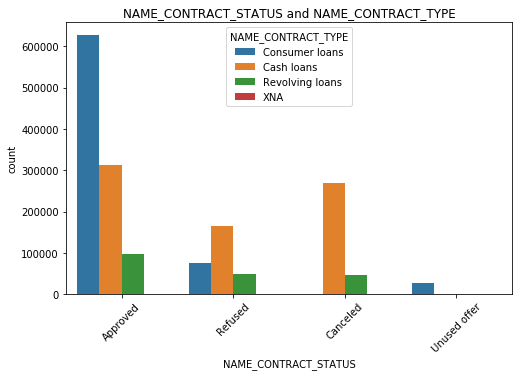

In [98]:
cateplot('NAME_CONTRACT_TYPE')

From the above graph we can say that consumer loans gets more approval thanany other case.

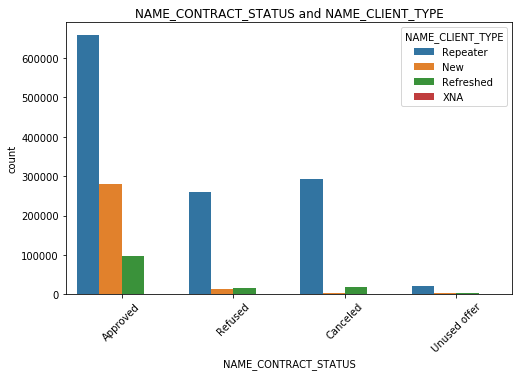

In [99]:
cateplot('NAME_CLIENT_TYPE')

From the above graph repeated applications get approval almost double as compared to new application.

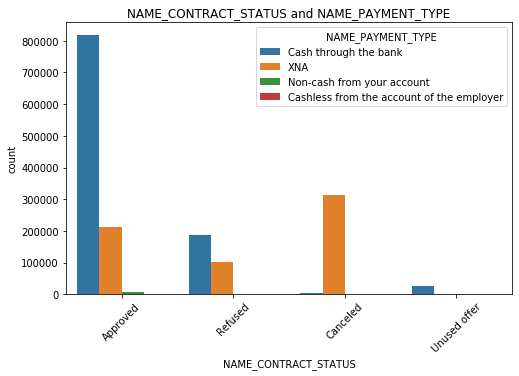

In [100]:
cateplot('NAME_PAYMENT_TYPE')

Payment method that client chose to pay for previous application that is cash through the bank got maximum number of approvals as compared to other category.

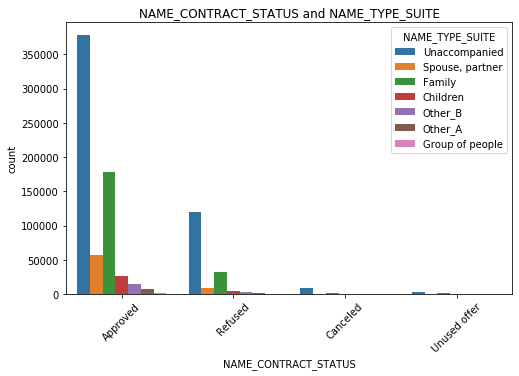

In [101]:
cateplot('NAME_TYPE_SUITE')

From the above plot, we can easily visualize that approval of loan do not need any accompanied person with them.

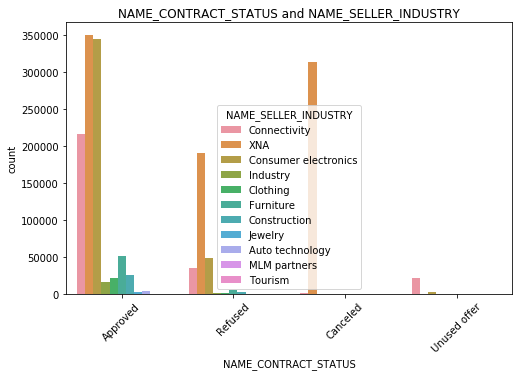

In [102]:
cateplot('NAME_SELLER_INDUSTRY')

This graph shows that Connectivity and Consumer electronics industry loans are approved maximum times as compared to other categories.

In [103]:
###  correlation for approved and refused of loan from previous applicaton

In [123]:
approved_corr=approved.iloc[0:,2:9]
refused_corr=refused.iloc[0:,2:9]
approved_c = approved_corr.corr(method = 'pearson')
refused_c= refused_corr.corr(method = 'pearson')   

In [124]:
# correlation for approval 
approved_c

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE
AMT_ANNUITY,1.000000,0.814343,0.826005,0.257858,0.830859
AMT_APPLICATION,0.814343,1.000000,0.961757,0.459238,1.000000
AMT_CREDIT,0.826005,0.961757,1.000000,0.266721,0.993244
AMT_DOWN_PAYMENT,0.257858,0.459238,0.266721,1.000000,0.459238
AMT_GOODS_PRICE,0.830859,1.000000,0.993244,0.459238,1.000000


In [125]:
# correlation for refusal
refused_c

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE
AMT_ANNUITY,1.000000,0.817869,0.819867,0.317283,0.822538
AMT_APPLICATION,0.817869,1.000000,0.983785,0.535586,0.999699
AMT_CREDIT,0.819867,0.983785,1.000000,0.386266,0.991777
AMT_DOWN_PAYMENT,0.317283,0.535586,0.386266,1.000000,0.535586
AMT_GOODS_PRICE,0.822538,0.999699,0.991777,0.535586,1.000000


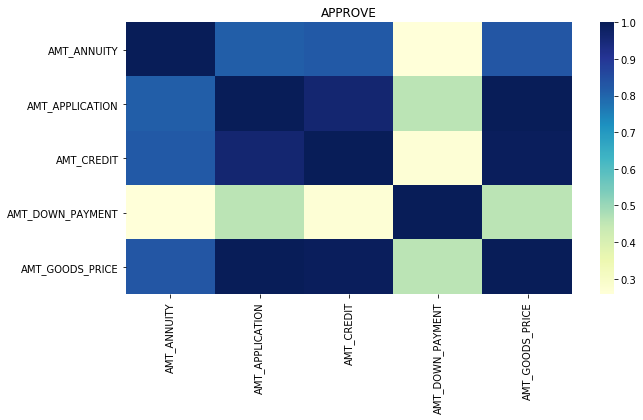

In [133]:
# heatmap of approval
plt.figure(figsize=[10,5])
sns.heatmap(approved_c,cmap="YlGnBu",annot=False)
plt.title('APPROVE')
plt.show()

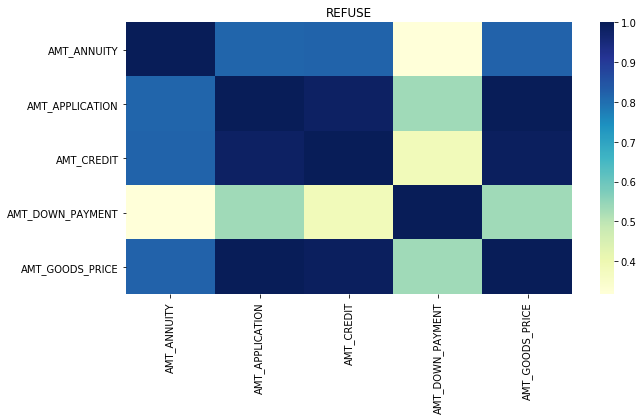

In [138]:
# heatmap of refusal
plt.figure(figsize=[10,5])
sns.heatmap(refused_c,cmap="YlGnBu",annot=False)
plt.title('REFUSE')
plt.show()

From the correlation tables and heat map we can clearly see that correlation between the variables is same for both the data frames approval application and refused application. The correlation between the variables chosen is positive. The correlation between AMT_CREDIT and AMT_ANNUITY is very where as AMT_DOWN_PAYMENT and AMT_CREDIT is not so well.

## Conclusion:
1.Banks should focus more on businessman, working type individual and students for the loan. We have also seen that the person above 30 are more likely to pay loan on time.

2.Bank should not consider the loan for which the purpose is not mentioned. Also the repair purpose loans should not be considered by the bank.

3.Bank should avoid providing loans co op apartment clients as they came under defaulter category most of the time.

4.Bank should consider clients who owns a house or apartment as they pay the annuity on time.

5.Bank should also consider the whether an old client payed all the installments on time or not while providing the new loan.